# Booru Data Analysis
This notebook will analyze good parameters to use when downloading images from boorus to create datasets

## Instal dependencies

In [ ]:
pip install pybooru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get Data
Here we will make multie queries to booru and get back all the metadata related to images relating to the tags we are searching through. This is the data we will be analyzing.

In [ ]:
from pybooru import Danbooru

client = Danbooru('danbooru')
tags = "hu_tao_(genshin_impact) rating:general" #@param {'type':'string'}
metadata = []
page = 1
limit = 100
while True:
  posts = client.post_list(limit=limit, tags=tags, page=page)
  print(posts)
  if len(posts) == 0:
      print(f"On Page {page} for tags {tags}. Found no posts. Ending.")
      break # we have reached the last page since there are no results
  else:
      metadata.extend(posts)
      page += 1

print(f"Data collection for tags=\"{tags}\" completed. Found {len(metadata)} results.")

[{'id': 5984019, 'created_at': '2023-01-14T23:37:57.834-05:00', 'uploader_id': 421595, 'score': 9, 'source': 'https://i.pximg.net/img-original/img/2023/01/15/13/36/45/104533893_p0.jpg', 'md5': '7d8ea800a9f5125e184b7b2409bcb9e0', 'last_comment_bumped_at': None, 'rating': 'g', 'image_width': 2752, 'image_height': 6043, 'tag_string': '6+girls :o absurdres ahoge alternate_costume artist_name bag bangs bare_shoulders bell black_dress black_nails blonde_hair blue_hair book braid branch breasts cafe cherry clipboard collar commentary cone_hair_bun container contemporary counter crown_braid cup dated day detached_collar diona_(genshin_impact) double_bun dress duplicate feeding flower food frilled_hairband frills fruit ganyu_(genshin_impact) genshin_impact glass goat_horns grey_hair hair_bun hair_flower hair_ornament hair_ribbon hairband hat heart highres holding holding_clipboard holding_food holding_menu horns hu_tao_(genshin_impact) ice_cream indoors keqing_(genshin_impact) lily_(flower) lon

## Filtering data
Downloading the metadata early might have taken some time so we don't want to have to redownload everything as we decide to filter our dataset down by pruning for unwanted tags. We will make a copy of our metadata and work on that instead.
We will filter it by
1. removing posts that contain unwanted tags
2. remove posts that don't meet a minimum score
3. remove posts that are not parents, if desired. Useful because children posts tend to be very similar to parent posts and are often edits.


In [ ]:
from numpy.ma.core import minimum
metadata2 = []
unwated_tags = "monochrome, comic, sex, hetero, yuri, 2girls, 3girls, multiple_boys, multiple_girls, 1boy, chibi, 2boys, 3boys, english_text, multiple_views, japanese_text, chinese_text, translation_request, censored, out-of-frame_censoring" #@param {'type': 'string'}
minimum_score = 0 #@param {'type': 'integer'}
include_children = False #@param {'type': 'boolean'}
unwated_tags_list = unwated_tags.replace(" ", "").split(",")
print(unwated_tags_list)
for post in metadata:
  wanted = True
  if post['is_deleted']:
    continue # we won't consider deleted posts
  if not include_children and post['parent_id']:
    continue # reject because we don't want childrent and this is a child by virtue of having a parent
  if post['score'] < minimum_score:
    continue; # reject for being under score
  for unwanted_tag in unwated_tags_list:
    if unwanted_tag in post['tag_string']:
      wanted = False # reject for having unwanted tag
      break
  if wanted:
    metadata2.append(post)

print(f"Original metadata contained {len(metadata)} posts. Trimmed down to {len(metadata2)} posts. Removed {len(metadata) - len(metadata2)} posts.")
    

['monochrome', 'comic', 'sex', 'hetero', 'yuri', '2girls', '3girls', 'multiple_boys', 'multiple_girls', '1boy', 'chibi', '2boys', '3boys', 'english_text', 'multiple_views', 'japanese_text', 'chinese_text', 'translation_request', 'censored', 'out-of-frame_censoring']
Original metadata contained 2168 posts. Trimmed down to 1246 posts. Removed 922 posts.


lowest score: 0
25th percentile score: 19
50th percentile score: 27
75th percentile score: 40
highest score: 386


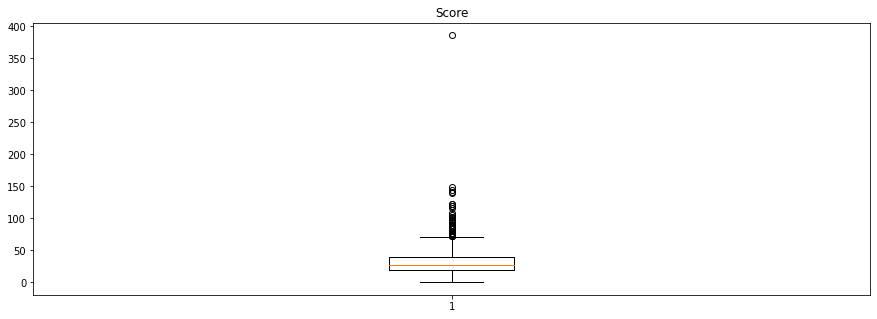

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
scores = [x["score"] for x in metadata2]
np_scores = np.asarray(scores)
plt.figure(figsize=(15, 5))
plt.boxplot(np_scores)
plt.title("Score")
percentiles = np.percentile(np_scores, [0, 25, 50, 75, 100]).astype(np.int64)
print(f"lowest score: {percentiles[0]}")
print(f"25th percentile score: {percentiles[1]}")
print(f"50th percentile score: {percentiles[2]}")
print(f"75th percentile score: {percentiles[3]}")
print(f"highest score: {percentiles[4]}")

## Detour
What do images at a particular score in our current filtered list look like?

--2023-01-15 09:20:09--  https://cdn.donmai.us/original/f0/fe/f0fe2a063f8621ff0c065cff8aa7a888.png
Resolving cdn.donmai.us (cdn.donmai.us)... 104.26.10.39, 172.67.70.99, 104.26.11.39, ...
Connecting to cdn.donmai.us (cdn.donmai.us)|104.26.10.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 893443 (873K) [image/png]
Saving to: ‘example’

example             100%[===================>] 872.50K  2.15MB/s    in 0.4s    

2023-01-15 09:20:10 (2.15 MB/s) - ‘example’ saved [893443/893443]



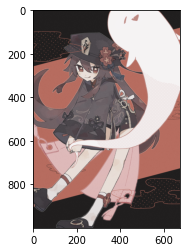

Post 5727817 with score 27
--2023-01-15 09:20:11--  https://cdn.donmai.us/original/ad/be/adbed9aab4f3c80b9341b600eb38e445.jpg
Resolving cdn.donmai.us (cdn.donmai.us)... 104.26.10.39, 172.67.70.99, 104.26.11.39, ...
Connecting to cdn.donmai.us (cdn.donmai.us)|104.26.10.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365437 (357K) [image/jpeg]
Saving to: ‘example’

example             100%[===================>] 356.87K  1.39MB/s    in 0.3s    

2023-01-15 09:20:11 (1.39 MB/s) - ‘example’ saved [365437/365437]



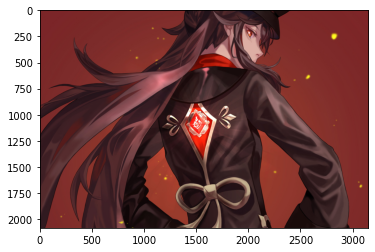

Post 5720108 with score 27
--2023-01-15 09:20:13--  https://cdn.donmai.us/original/9f/ec/9fec5583e77f06d8c8cd72988063fe21.jpg
Resolving cdn.donmai.us (cdn.donmai.us)... 104.26.10.39, 172.67.70.99, 104.26.11.39, ...
Connecting to cdn.donmai.us (cdn.donmai.us)|104.26.10.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244856 (239K) [image/jpeg]
Saving to: ‘example’

example             100%[===================>] 239.12K   940KB/s    in 0.3s    

2023-01-15 09:20:13 (940 KB/s) - ‘example’ saved [244856/244856]



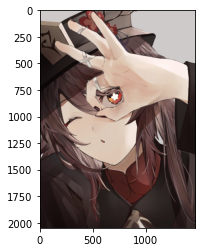

Post 5687359 with score 27


In [ ]:
import cv2
target_score =  27#@param {'type':'integer'}
image_limit = 3 #@param {'type': 'integer'}

used = 0
for post in metadata2:
  if post["score"] == target_score:
    !wget {post["file_url"]} -O "example"
    img = cv2.imread("example")
    img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_cvt)
    plt.show()
    print(f"Post {post['id']} with score {post['score']}")
    used+=1
    if used >= image_limit:
      break


## Partitioning our data
When training a LoRA we want images that have a broad range of representation of our subject. For example, if we wanted to train a LoRA for a character we would want full body tagged images or we might never learn what kind of shoes they wear. 

Sometimes certain types of images are a lot rarer than others so we want to break down our potential images into several categories so later we can set appropriate thresholds for determining which images we will keep for each category while maintaining a suitable number of images for training. 

**categories**: a comma delimited list of space sperated tags.
Example: *full_body standing, cowboy_shot*
each category will have only posts that have all tags in the category (so a category of only posts with *full_body and standing*)

An image will only be in one category, the first category in the list where they meet the condition. So if your categories were *standing, standing full_body*, then all the standing images would be in the first category and the second category of *standing full_body* will have no images because those were also *standing* images.

The *remaining* category will be everything else that didn't meet a category criteria.

In [ ]:
from collections import defaultdict
categories_dict = defaultdict(list)
categories = "full_body standing porkpie_hat, full_body standing, full_body, cowboy_shot porkpie_hat, porkpie_hat"  #@param {'type': 'string'}
category_tags = [x.strip().split(" ") for x in categories.split(",")]
print(f"Creating {len(category_tags) + 1} categories of {category_tags} and remaining")

for category in category_tags: # we set a default ahead of time so the order of dictionary is same as user entry
  categories_dict[" ".join(category)] = []

for post in metadata2:
  found_matching_category = False
  for category in category_tags:
    has_all_tags = True
    for tag in category:
      if tag in post['tag_string']:
        continue
      else:
        has_all_tags = False

    if has_all_tags:
      categories_dict[" ".join(category)].append(post)
      found_matching_category = True
  
  if not found_matching_category:
    categories_dict["remaining"].append(post)

i=1
for key in categories_dict.keys():
  print(f"category {i}: {key} has {len(categories_dict[key])} posts")
  i+=1   


Creating 6 categories of [['full_body', 'standing', 'porkpie_hat'], ['full_body', 'standing'], ['full_body'], ['cowboy_shot', 'porkpie_hat'], ['porkpie_hat']] and remaining
category 1: full_body standing porkpie_hat has 4 posts
category 2: full_body standing has 43 posts
category 3: full_body has 160 posts
category 4: cowboy_shot porkpie_hat has 37 posts
category 5: porkpie_hat has 347 posts
category 6: remaining has 787 posts


## Visualize Categories
Let's break down the number of posts and the images in each category

<ipython-input-104-37096055ffcf>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_categories_scores = np.asarray(categories_scores)


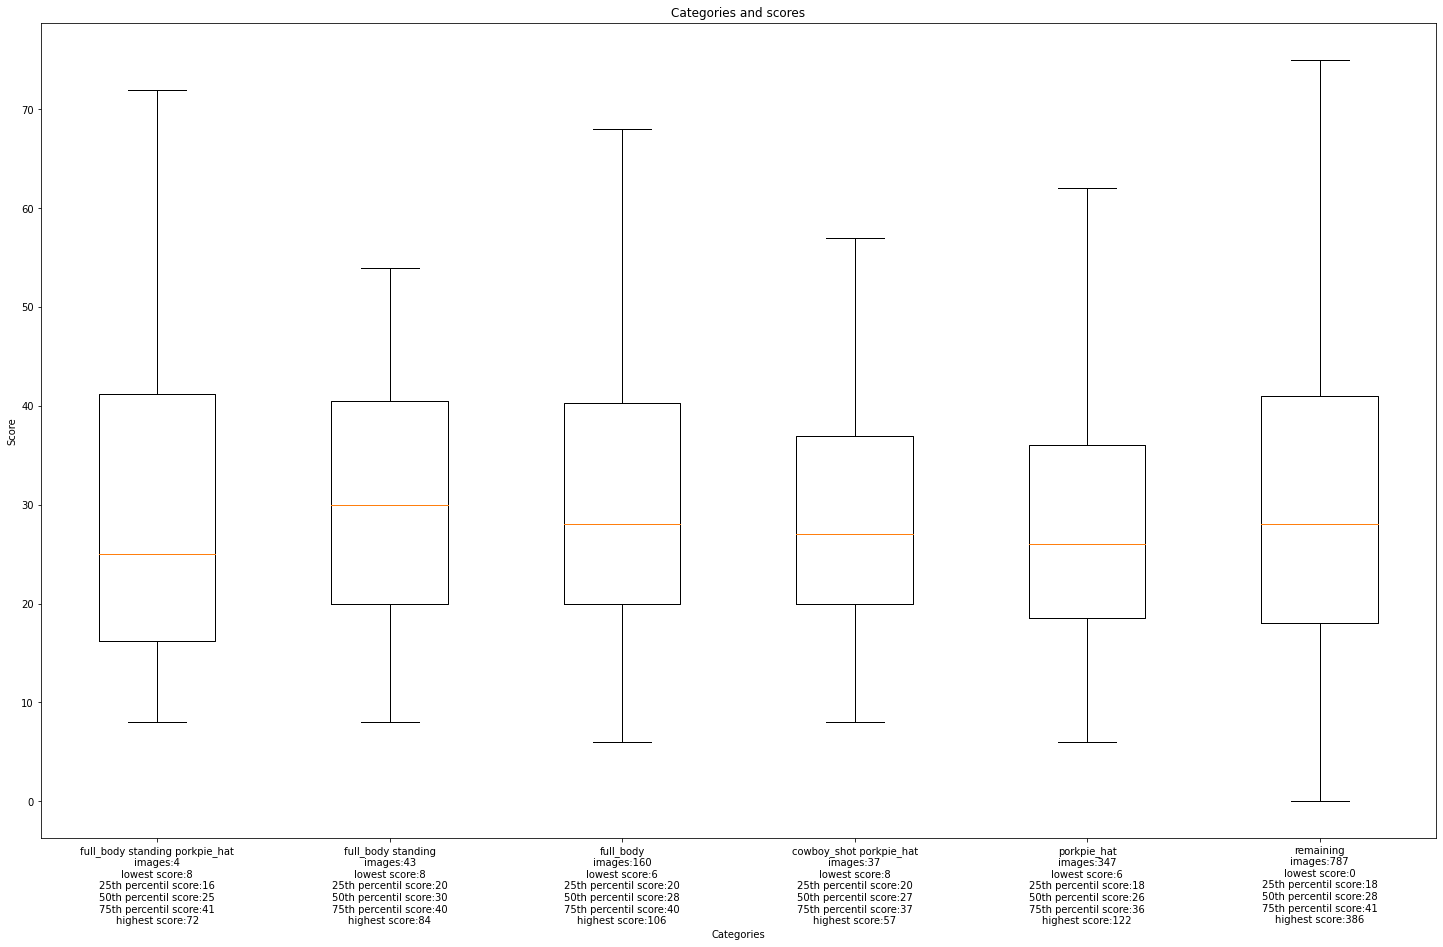

In [ ]:
categories_keys = []
categories_scores = []
for key in categories_dict.keys():
  scores = [post['score'] for post in categories_dict[key]]
  num_images = len(scores)
  np_scores = np.asarray(scores)
  percentiles = np.percentile(np_scores, [0, 25, 50, 75, 100]).astype(np.int64)
  categories_keys.append(key + f"\nimages:{num_images}" + f"\nlowest score:{percentiles[0]}" + f"\n25th percentil score:{percentiles[1]}" + f"\n50th percentil score:{percentiles[2]}" + f"\n75th percentil score:{percentiles[3]}" + f"\nhighest score:{percentiles[4]}")
  categories_scores.append(np_scores)
np_categories_scores = np.asarray(categories_scores)
plt.figure(figsize=(25, 15))
plt.boxplot(np_categories_scores, labels=categories_keys, showfliers=False)
plt.title("Categories and scores")
plt.xlabel("Categories")
plt.ylabel("Score")
plt.show()

## Per category score thresholding
For each category we will individuall assign a score threshold for what is accepted. While score isn't truly the best measure of how well an image will serve as training data for getting an accurate representation of our subject, we do have a good deal of confidence that higher rated images are drawn better and aesthetics is important for our dataset.

**scores_for_each_category**: this is a list of scores for each category where the post must be at or above this score in order to be kept. This should have as many numbers as you had categories in the previous section, including the _remaining_ category. It will be in the order you specified with *remaining* being last.

In [ ]:
scores_for_each_category = "8, 20, 40, 20, 36, 41" #@param {'type': 'string'}
scores_for_each_category_list = [int(x.strip()) for x in scores_for_each_category.split(",")]
print("Thresholding each category with scores:")
i = 0
for key in categories_dict.keys():
  print(f"    {key:<30} score: {scores_for_each_category_list[i]} ")
  i+=1

threshholded_categories_dict = defaultdict(list)
i = 0
for key in categories_dict.keys():
  required_score_for_category = scores_for_each_category_list[i]
  for post in categories_dict[key]:
    if post['score'] >= required_score_for_category:
      threshholded_categories_dict[key].append(post)
  i+= 1

print(f"Before thresholding:")
i=1
for key in categories_dict.keys():
  print(f"    category {i}: {key} has {len(categories_dict[key])} posts")
  i+=1   
# report thresholding results
print(f"After thresholding:")
i=1
for key in threshholded_categories_dict.keys():
  print(f"    category {i}: {key} has {len(threshholded_categories_dict[key])} posts")
  i+=1   

Thresholding each category with scores:
    full_body standing porkpie_hat score: 8 
    full_body standing             score: 20 
    full_body                      score: 40 
    cowboy_shot porkpie_hat        score: 20 
    porkpie_hat                    score: 36 
    remaining                      score: 41 
Before thresholding:
    category 1: full_body standing porkpie_hat has 4 posts
    category 2: full_body standing has 43 posts
    category 3: full_body has 160 posts
    category 4: cowboy_shot porkpie_hat has 37 posts
    category 5: porkpie_hat has 347 posts
    category 6: remaining has 787 posts
After thresholding:
    category 1: full_body standing porkpie_hat has 4 posts
    category 2: full_body standing has 33 posts
    category 3: full_body has 42 posts
    category 4: cowboy_shot porkpie_hat has 30 posts
    category 5: porkpie_hat has 89 posts
    category 6: remaining has 206 posts


## Download data
Now we will download all the posts that remain after thresholding.
Each post will be downloaded into a directory for the category.


In [ ]:
import json
import requests
import shutil
from pathlib import Path

directory = "/content/data/" #@param {'type': 'string'}
prepend_tags = "hu_tao_(genshin_impact)" #@param {'type': 'string'}
process_tags_for_training_format = True #@param {'type': 'boolean'}
download_images = True #@param {'type': 'boolean'}

Path(f"{directory}").mkdir(exist_ok=True)

metadata_json = json.dumps(metadata)
with open(f'{directory}/metadata.json','w') as f:
  f.write(metadata_json)

for key in threshholded_categories_dict.keys():
  Path(f"{directory}/{key}").mkdir(exist_ok=True)
  for post in threshholded_categories_dict[key]:
    header = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
    file_url = post["file_url"]
    file_name = post["id"]
    file_extension = post["file_ext"]
    tag_string = post["tag_string_general"]

    file_path = Path(f'{directory}/{key}')
    file_path.mkdir(exist_ok=True)

    # Write metadata
    p = Path(file_path, f'{file_name}.json')
    p.write_text(json.dumps(post))
    # Write tags
    tags = prepend_tags + " " + tag_string
    if process_tags_for_training_format:
      tags = tags.replace(" ", ", ").replace("_", " ")
    Path(file_path, f'{file_name}.txt').write_text(tags)

    if download_images:
      r = requests.get(file_url, stream = True, headers=header)
      if r.status_code == 200:
          # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
          r.raw.decode_content = True
          Path(file_path, f'{file_name}.{file_extension}').write_bytes(r.raw.data)
    else:
        print('Image Couldn\'t be retreived,', file_url, post)
    


# Package up data
Zip up the data for download. You can download directly from collab (might be slow) or move the contents to a mounted gdrive or upload to huggingface via git lfs (implement it yourself, this only supports direct download from collab atm)

In [ ]:
directory = "/content/data/" #@param {'type': 'string'}
zip_file = "/content/data.zip" #@param {'type': 'string'}
!zip -r {zip_file} {directory}

  adding: content/data/ (stored 0%)
  adding: content/data/.ipynb_checkpoints/ (stored 0%)
  adding: content/data/cowboy_shot porkpie_hat/ (stored 0%)
  adding: content/data/cowboy_shot porkpie_hat/5912163.txt (deflated 49%)
  adding: content/data/cowboy_shot porkpie_hat/5899234.json (deflated 65%)
  adding: content/data/cowboy_shot porkpie_hat/5445385.json (deflated 64%)
  adding: content/data/cowboy_shot porkpie_hat/5763600.json (deflated 66%)
  adding: content/data/cowboy_shot porkpie_hat/5546766.txt (deflated 50%)
  adding: content/data/cowboy_shot porkpie_hat/5425333.json (deflated 64%)
  adding: content/data/cowboy_shot porkpie_hat/5652742.json (deflated 64%)
  adding: content/data/cowboy_shot porkpie_hat/5916052.jpg (deflated 1%)
  adding: content/data/cowboy_shot porkpie_hat/5674158.json (deflated 65%)
  adding: content/data/cowboy_shot porkpie_hat/5587520.jpg (deflated 1%)
  adding: content/data/cowboy_shot porkpie_hat/5899234.png (deflated 1%)
  adding: content/data/cowboy_sh